In [46]:
import sys
import os


SCRIPT_PATH = os.path.join(os.path.abspath(os.path.dirname('../__file__')), 'script')
sys.path.insert(0, SCRIPT_PATH)

from simon_device import *
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.preprocessing import MinMaxScaler, Normalizer



sns.set(font_scale=2, rc={'lines.linewidth':5})
sns.set_style('white')

## EVC in Realistic Task


In [47]:
motivation = [1,2,3]
init_cost = [0.05, 0.1, 0.5]


motivation = np.linspace(0.1, 3.3, 11).round(1)
init_cost = [0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5]

In [48]:
def run_evc_simulation(motivation=[1,2,3], init_cost=[0.05, 0.1, 0.5], log='evc_fg_s100'):
    if log:
        df_model, _ = run_simulation(log=log, log_append=False, verbose=False)
        return df_model
    
    param_comb = [(motivation[i], init_cost[i]) for i in range(len(init_cost))]
    param_sets = [{"motivation": motivation, "init_cost": init_cost, 'update_cost':False, 'valid_cue_percentage':0.8} for motivation, init_cost in param_comb]

    df_models = []
    for param_set in param_sets: 
        df_model, _ = run_simulation(log='evc_fg_s100', log_append=True, verbose=False, n_simulation=100, n_session=1, param_set=param_set)
        df_models.append(df_model)

    df = pd.concat(df_models, axis=0)
    return df

In [49]:
def process_model_data(df):
    df_model = df.copy()
    df_model['motivation_level'] = pd.cut(df_model['motivation'], 3, labels=['low', 'medium', 'high'], ordered=True)
    # df_model['cost_level'] = pd.cut(df_model['cost'], 3, labels=['low', 'medium', 'high'], ordered=True)
    df_model['cost_level'] = df_model['cost'].map(dict(zip(np.unique(init_cost), ['low', 'medium', 'high'])))
    df_model['control_intensity'] = df_model[['motivation_level', 'cost_level']].apply(tuple, axis=1).map({('low', 'low'):'low', ('medium', 'medium'):'medium', ('high', 'high'):'high'})
    # df_model[['u_check', 'check_time', 'received_reward', 'motivation', 'cost']] =  MinMaxScaler().fit_transform(df_model[['u_check', 'check_time', 'received_reward', 'motivation', 'cost']])
    return df_model

def plot_evc(df_model):    
    fig, ax = plt.subplots(figsize=(15, 6))
    fig.suptitle('The EVC in Realistic Task')
    ax = sns.pointplot(data=df_model, x='control_intensity', y='u_check', errorbar='se', order=['low', 'medium', 'high'], label='Utility of CHECK (EVC)', color='purple')
    ax = sns.pointplot(data=df_model, x='control_intensity', y='cost',   errorbar='se', order=['low', 'medium', 'high'], label='Cost', color='tomato')
    ax = sns.pointplot(data=df_model, x='control_intensity', y='motivation',  errorbar='se',  order=['low', 'medium', 'high'], label='M (Payoff)', color='forestgreen')
    # ax = sns.barplot(data=df_model, x='control_intensity', y='check_time', color='gray', alpha=0.2)
    ax.legend(loc='best')
    ax.set_ylabel('')
    ax.set_xlabel('Control Intensity')
    plt.show()

In [50]:
df = run_evc_simulation(motivation=motivation, init_cost=init_cost, log='evc_fg_s100')

......>>> LOAD SIMULATION DATA <<<......
[['evc_fg_s100_230623']]


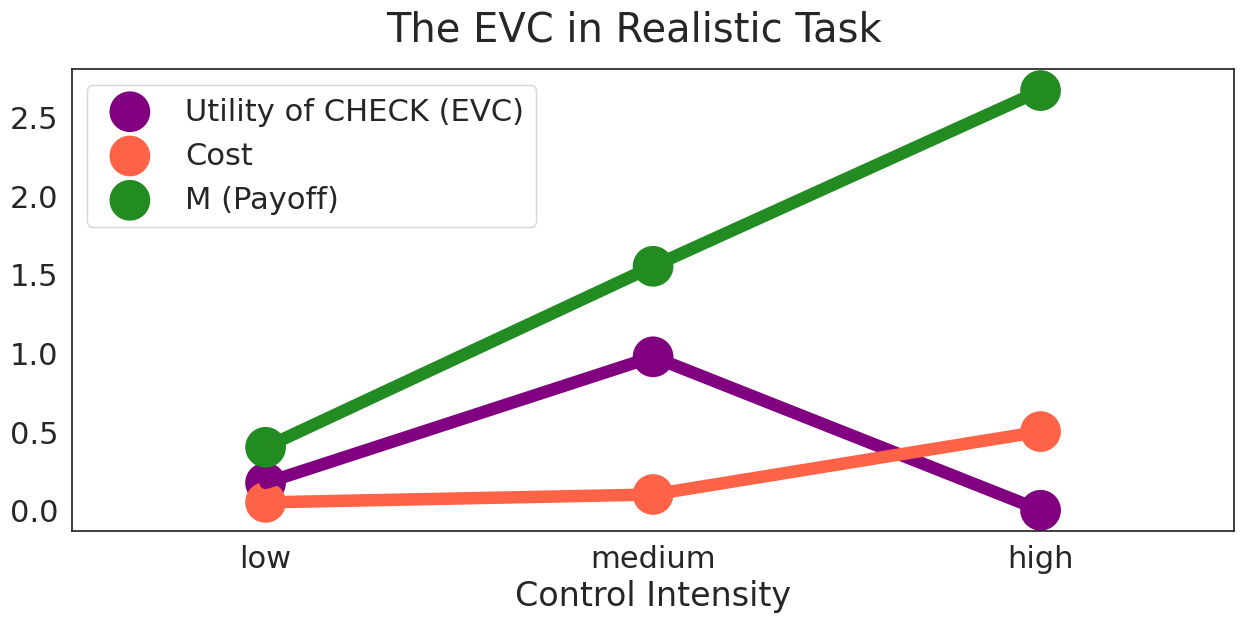

In [51]:
df_model = process_model_data(df)
plot_evc(df_model)

In [52]:
df_model[['motivation', 'motivation_level', 'cost', 'cost_level', 'control_intensity']].drop_duplicates()

,motivation,motivation_level,cost,cost_level,control_intensity
0,0.1,low,0.05,low,low
7500,0.4,low,0.05,low,low
15000,0.7,low,0.05,low,low
22500,1.1,medium,0.10,medium,medium
30000,1.4,medium,0.10,medium,medium
37500,1.7,medium,0.10,medium,medium
45000,2.0,medium,0.10,medium,medium
52500,2.3,high,0.50,high,high
60000,2.7,high,0.50,high,high
67500,3.0,high,0.50,high,high


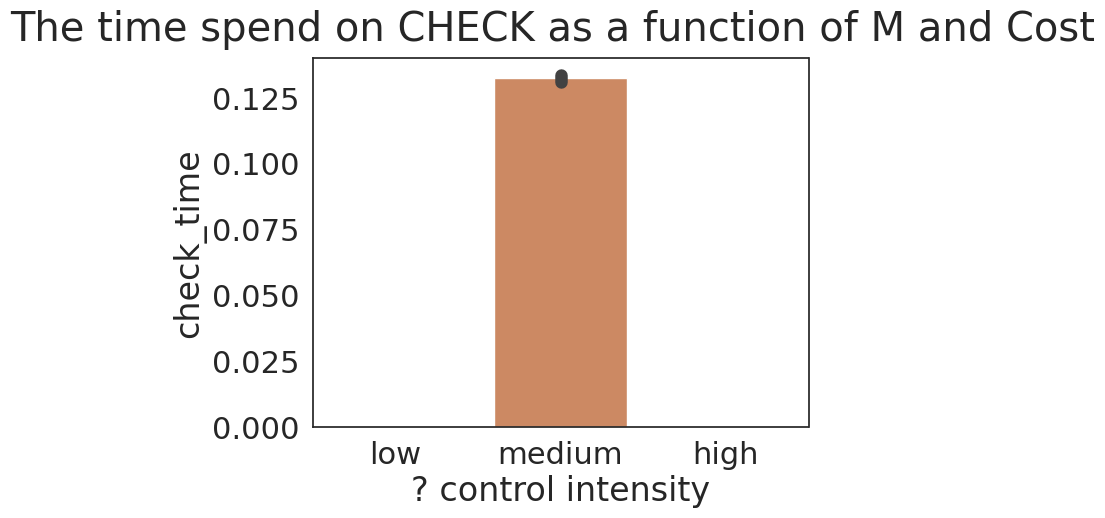

In [57]:
fig, ax = plt.subplots()
fig.suptitle('The time spend on CHECK as a function of M and Cost')
ax = sns.barplot(data=df_model, x='control_intensity', y='check_time', order=['low', 'medium', 'high'])
ax.set_xlabel('? control intensity')
plt.show()

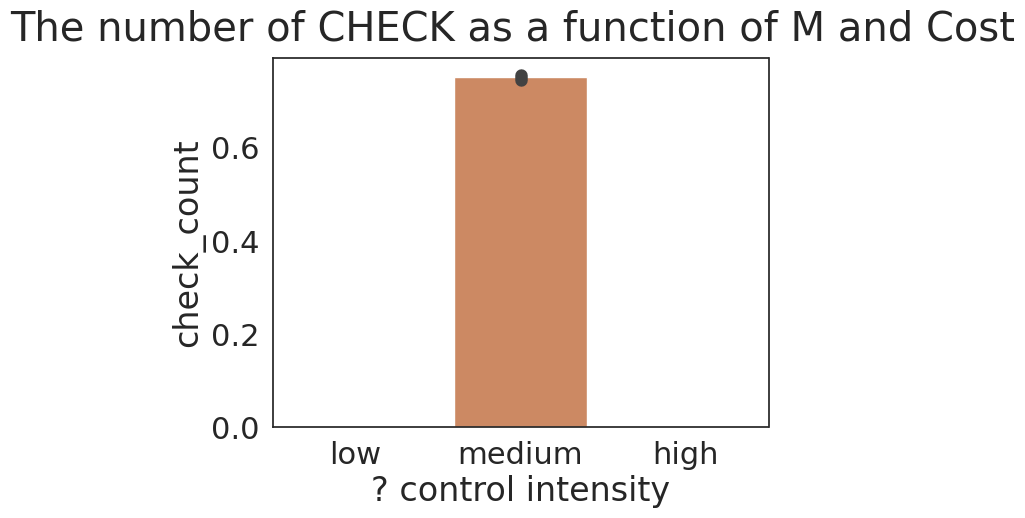

In [58]:
fig, ax = plt.subplots()
fig.suptitle('The number of CHECK as a function of M and Cost')
ax = sns.barplot(data=df_model, x='control_intensity', y='check_count',  order=['low', 'medium', 'high'])
ax.set_xlabel('? control intensity')
plt.show()